# LATIHAN PRAK PEMBELAJARAN MESIN PERTEMUAN 6
**NAMA : Galang Dwiwana Thabrani**

**NIM : 1227050048**

**menggunakan dataset Wine bawaan dari sklearn.datasets**

- Berisi 178 sampel wine.

- Masing-masing sampel memiliki 13 fitur kimia dari wine.

- Target/labelnya adalah 3 kelas anggur yang berbeda (class_0, class_1, class_2).



In [6]:
# Import library
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:

# Load data Wine ke dalam DataFrame
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

wine = sklearn_to_df(datasets.load_wine())
wine.rename(columns={'target': 'class'}, inplace=True)

# Tampilkan ringkasan statistik
wine.describe().T


count        mean         std     min       25%  \
alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
malic_acid                    178.0    2.336348    1.117146    0.74    1.6025   
ash                           178.0    2.366517    0.274344    1.36    2.2100   
alcalinity_of_ash             178.0   19.494944    3.339564   10.60   17.2000   
magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
total_phenols                 178.0    2.295112    0.625851    0.98    1.7425   
flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
nonflavanoid_phenols          178.0    0.361854    0.124453    0.13    0.2700   
proanthocyanins               178.0    1.590899    0.572359    0.41    1.2500   
color_intensity               178.0    5.058090    2.318286    1.28    3.2200   
hue                           178.0    0.957449    0.228572    0.48    0.7825   
od280/od315_of_diluted_wines  178.0    2.611685    0.709990    1.27    1.9375   
proline                       178.0  746.893258  314.907474  278.00  500.5000   
class                         178.0    0.938202    0.775035    0.00    0.0000   

                                  50%       75%      max  
alcohol                        13.050   13.6775    14.83  
malic_acid                      1.865    3.0825     5.80  
ash                             2.360    2.5575     3.23  
alcalinity_of_ash              19.500   21.5000    30.00  
magnesium                      98.000  107.0000   162.00  
total_phenols                   2.355    2.8000     3.88  
flavanoids                      2.135    2.8750     5.08  
nonflavanoid_phenols            0.340    0.4375     0.66  
proanthocyanins                 1.555    1.9500     3.58  
color_intensity                 4.690    6.2000    13.00  
hue                             0.965    1.1200     1.71  
od280/od315_of_diluted_wines    2.780    3.1700     4.00  
proline                       673.500  985.0000  1680.00  
class                           1.000    2.0000     2.00

In [8]:

# Tampilkan 10 data teratas
wine.head(10)


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   od280/od315_of_diluted_wines  proline  class  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0  
5                          2.85   1450.0      0  
6                          3.58   1290.0      0  
7                          3.58   1295.0      0  
8                          2.85   1045.0      0  
9                          3.55   1045.0      0

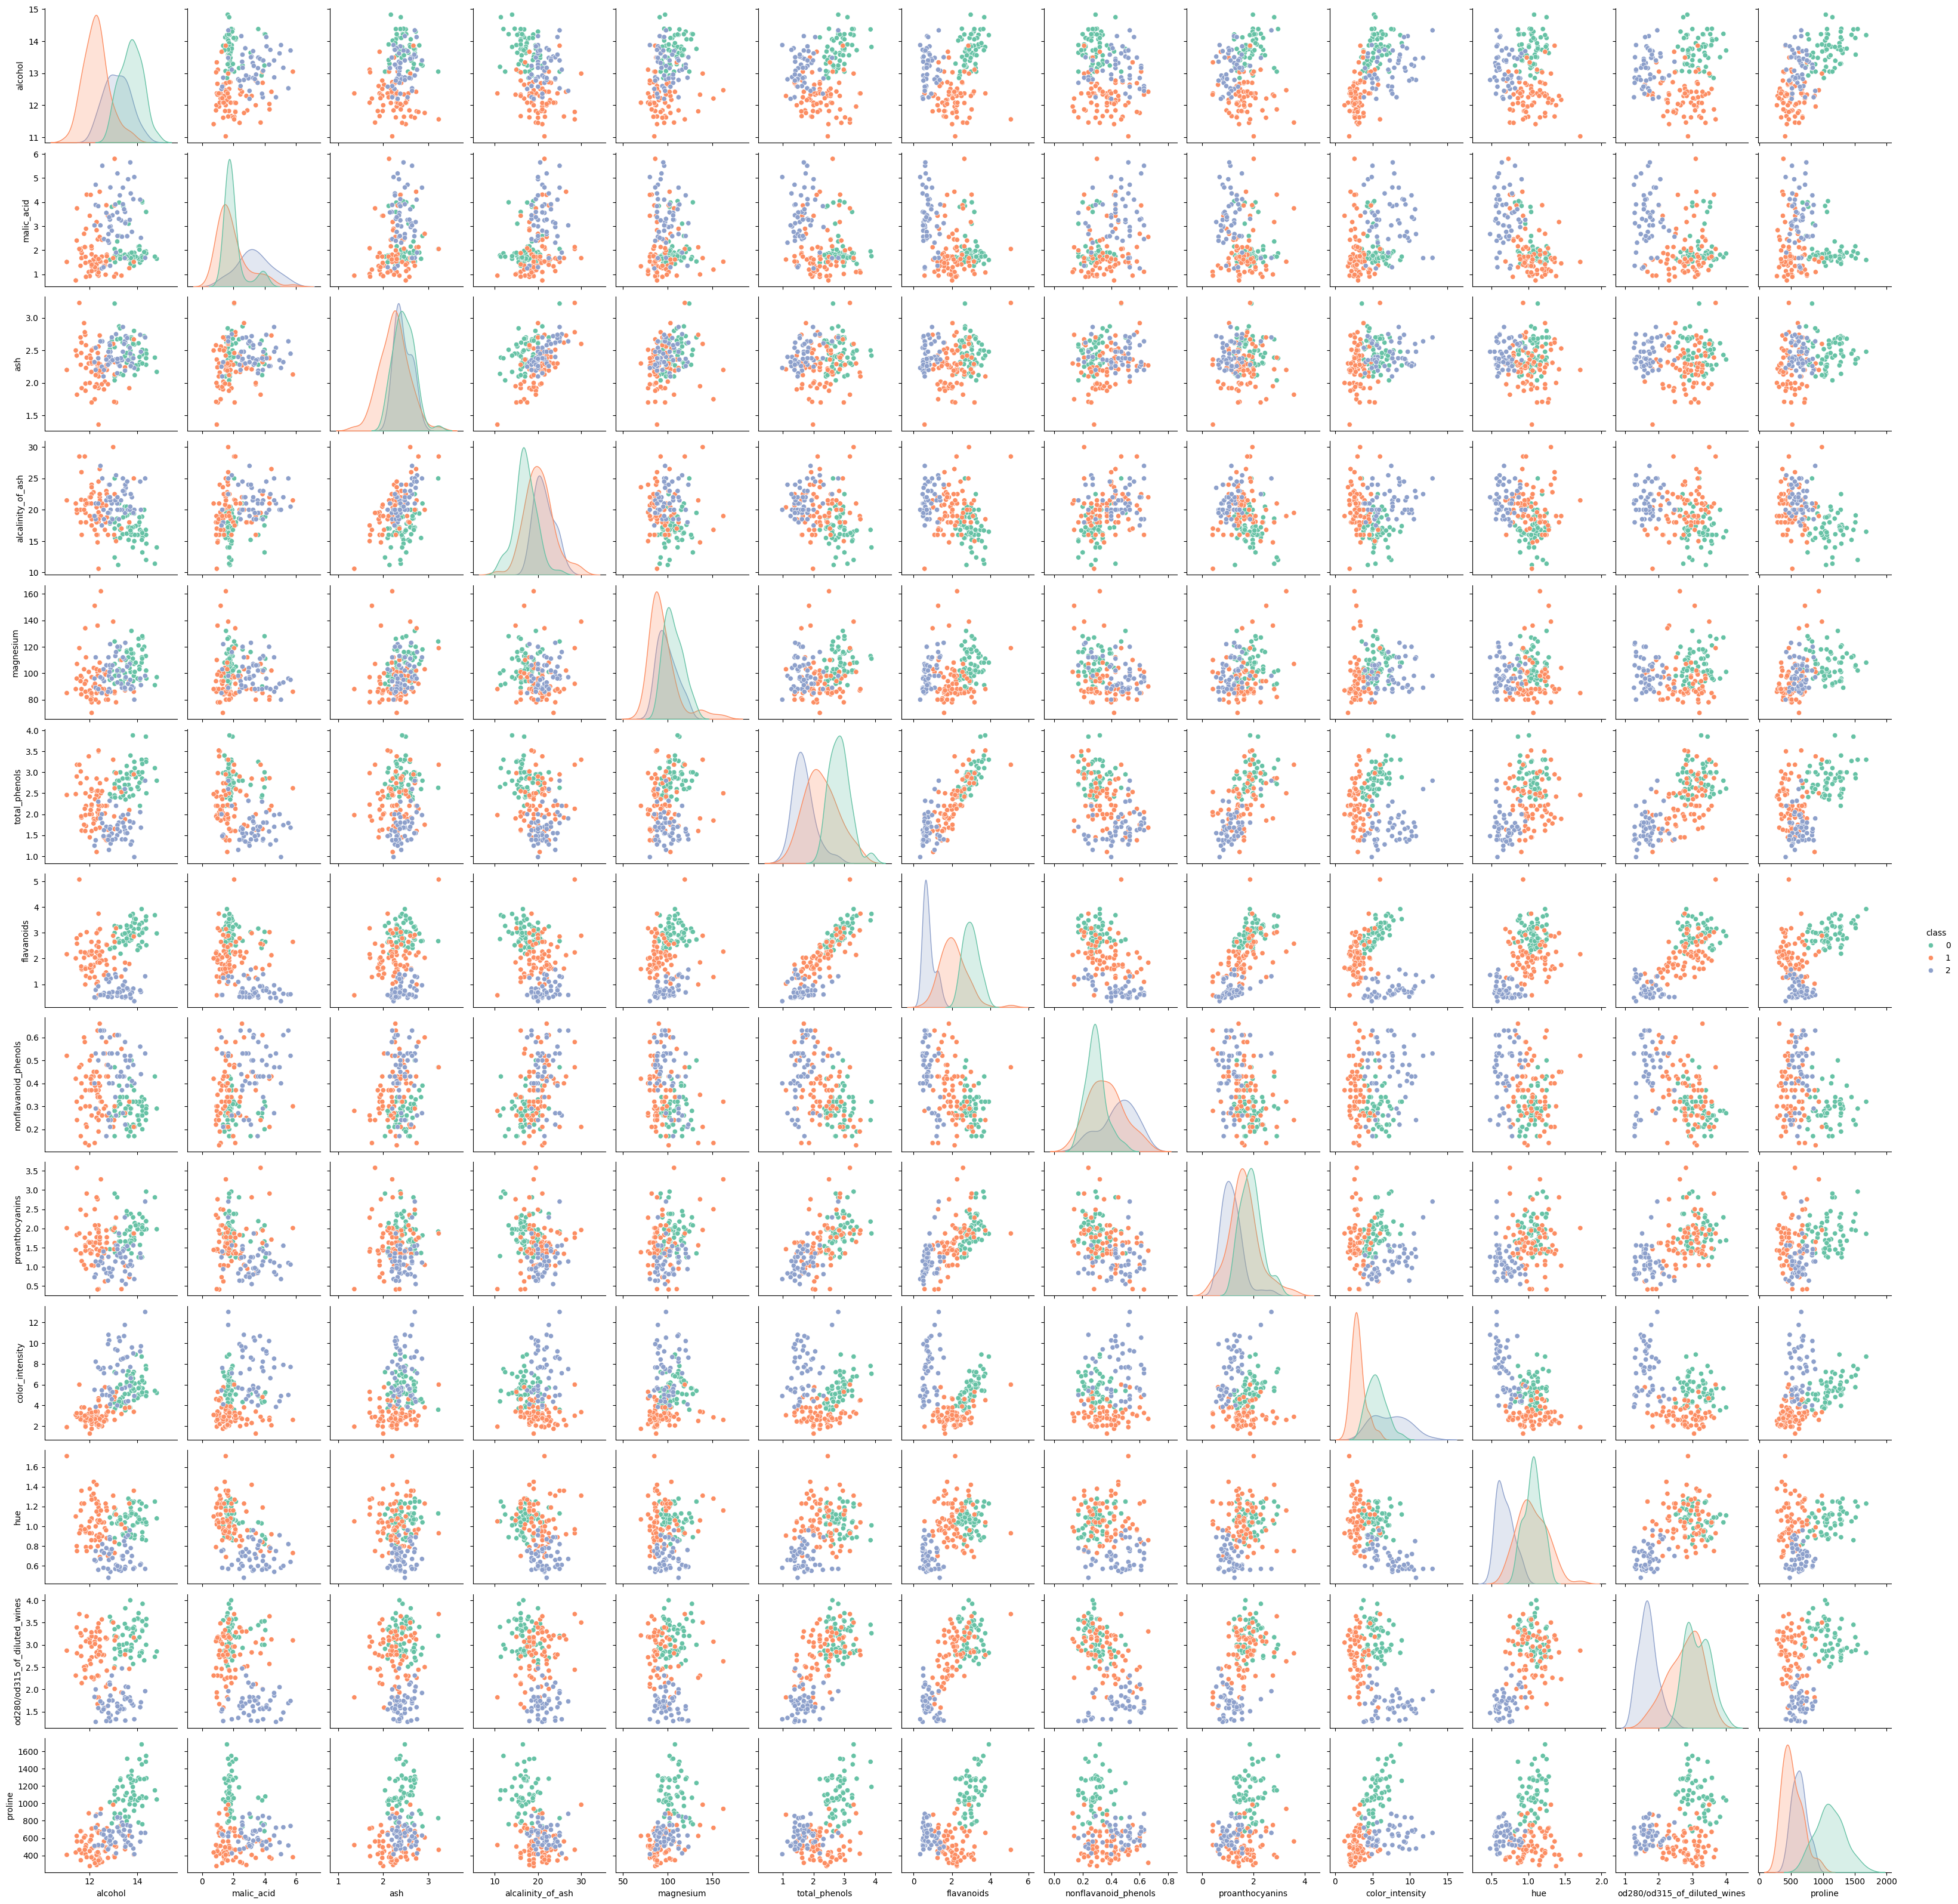

In [9]:

# Pairplot visualisasi antar fitur
sns.pairplot(wine, hue='class', palette='Set2')


In [10]:

# Split fitur dan target
from sklearn.model_selection import train_test_split

x = wine.drop('class', axis=1)
y = wine['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)


In [11]:

# Tampilkan jumlah data latih
print("Jumlah data training:", len(x_train))


Jumlah data training: 124


In [12]:

# Latih model Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Prediksi data test
y_pred = model.predict(x_test)


In [13]:

# Tampilkan classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.92      0.81      0.86        27
           2       0.65      0.92      0.76        12

    accuracy                           0.83        54
   macro avg       0.83      0.84      0.83        54
weighted avg       0.86      0.83      0.84        54



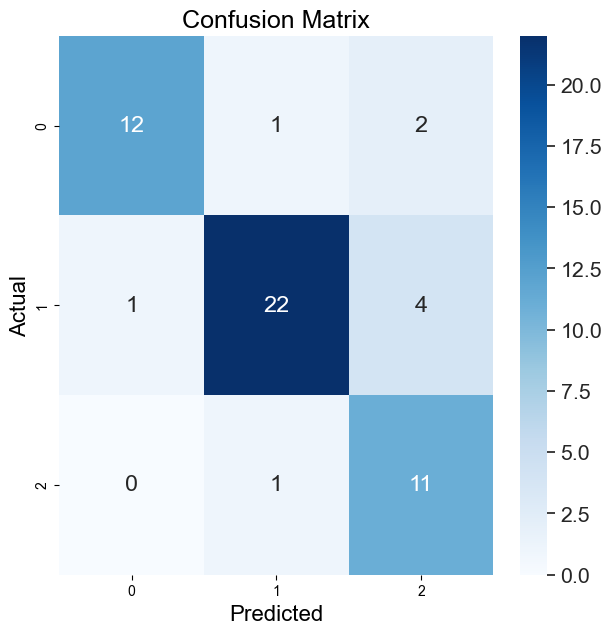

In [14]:

# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


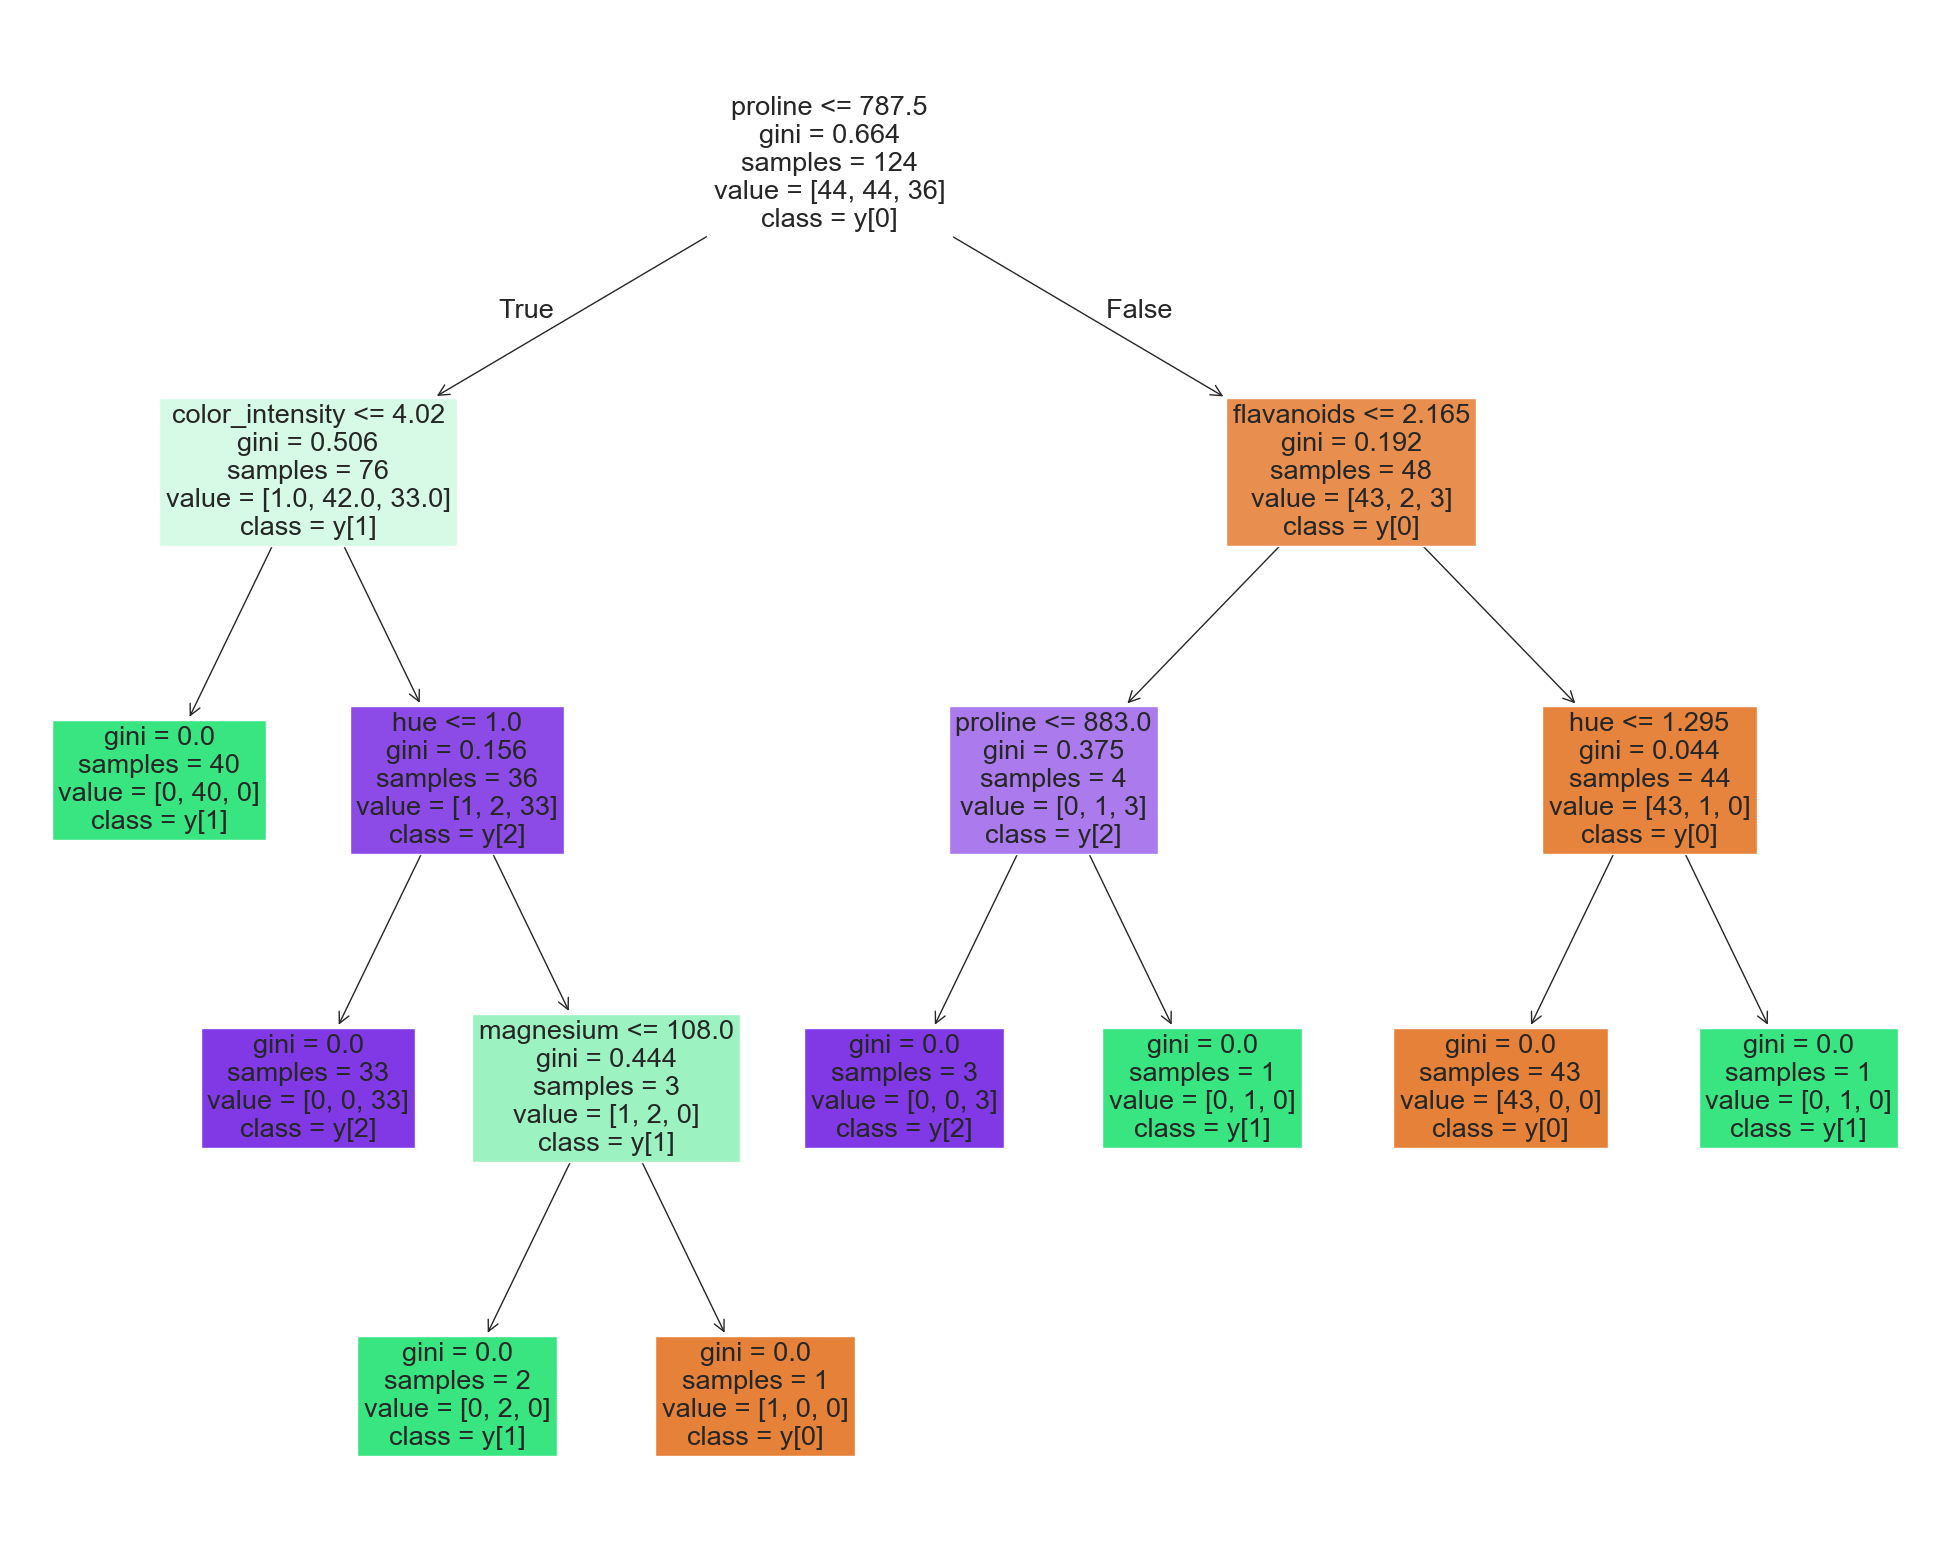

In [15]:

# Visualisasi pohon keputusan
from sklearn import tree

features = x.columns.tolist()
fig, ax = plt.subplots(figsize=(25, 20))
tree.plot_tree(model, feature_names=features, class_names=True, filled=True)
plt.show()


In [16]:

# Prediksi data baru 1
wine_test_data = {
    'alcohol': 13.0,
    'malic_acid': 2.0,
    'ash': 2.36,
    'alcalinity_of_ash': 20.0,
    'magnesium': 100.0,
    'total_phenols': 2.8,
    'flavanoids': 3.1,
    'nonflavanoid_phenols': 0.3,
    'proanthocyanins': 1.9,
    'color_intensity': 5.2,
    'hue': 1.05,
    'od280/od315_of_diluted_wines': 3.4,
    'proline': 1050.0
}


In [17]:
# %%
# Urutkan input sesuai kolom data training
feature_order = x.columns.tolist()
prediction_input_df = pd.DataFrame([wine_test_data])
prediction = model.predict(prediction_input_df[feature_order])
print("Predicted class index:", prediction)


Predicted class index: [0]


In [18]:
# %%
# Tampilkan nama class berdasarkan index prediksi
target_names = datasets.load_wine().target_names
print("Predicted class:", target_names[prediction[0]])


Predicted class: class_0


In [19]:
#prediksi data baru 2
wine_test_data = {
    'alcohol': 13.2,
    'malic_acid': 3.2,
    'ash': 2.4,
    'alcalinity_of_ash': 22.0,
    'magnesium': 100,
    'total_phenols': 1.7,
    'flavanoids': 0.8,
    'nonflavanoid_phenols': 0.5,
    'proanthocyanins': 1.3,
    'color_intensity': 7.3,
    'hue': 0.7,
    'od280/od315_of_diluted_wines': 1.8,
    'proline': 600
}


In [20]:
# %%
# Urutkan input sesuai kolom data training
feature_order = x.columns.tolist()
prediction_input_df = pd.DataFrame([wine_test_data])
prediction = model.predict(prediction_input_df[feature_order])
print("Predicted class index:", prediction)


Predicted class index: [2]


In [21]:
# %%
# Tampilkan nama class berdasarkan index prediksi
target_names = datasets.load_wine().target_names
print("Predicted class:", target_names[prediction[0]])


Predicted class: class_2


Model klasifikasi pohon keputusan (Decision Tree) yang telah dibangun menunjukkan performa yang baik dalam mengelompokkan data wine ke dalam tiga kelas yang tersedia. Setelah dilakukan pelatihan dengan data wine yang mengandung berbagai fitur kimia, model mampu mempelajari pola dari masing-masing jenis wine. Sebagai contoh, ketika diberikan data uji (data dummy) dengan karakteristik mirip kelas 2, model berhasil memprediksi bahwa data tersebut termasuk dalam kelas 2. Hal ini menunjukkan bahwa model tidak hanya mampu menghafal data training, tetapi juga dapat menggeneralisasi pola dan melakukan prediksi terhadap data baru dengan akurat.

